### UAS

https://github.com/aksalnvnza/KecerdasanBuatan/tree/main/Latihan

Calculated Customer Happiness: 67.50%


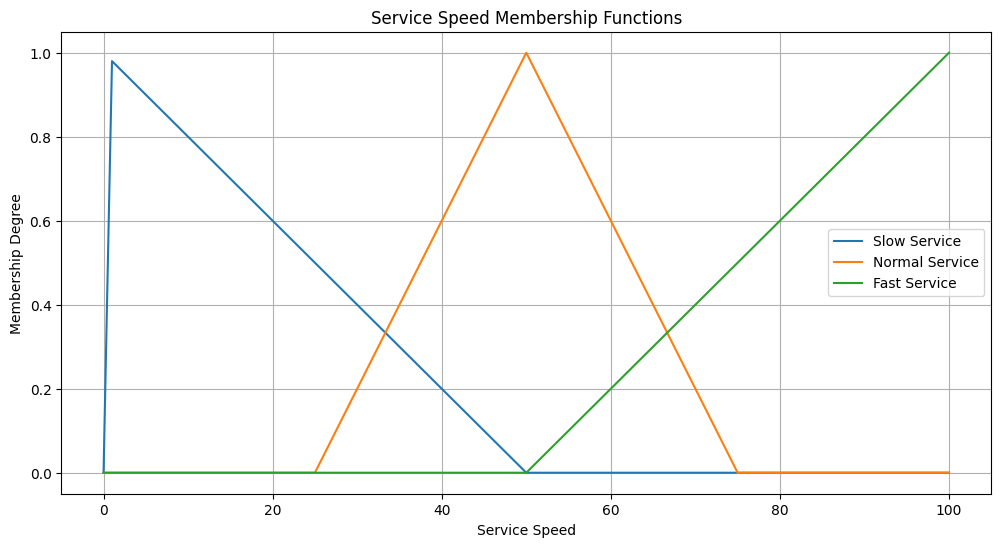

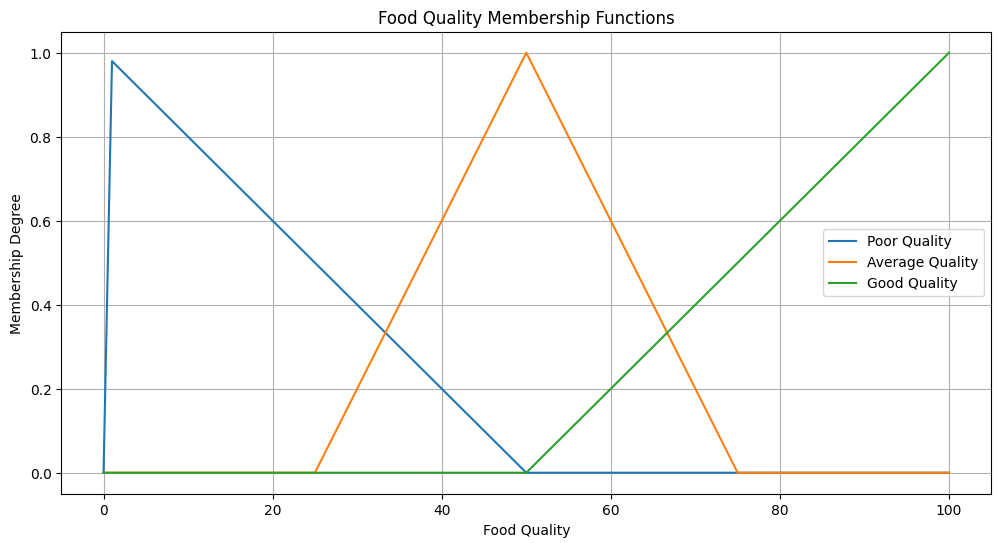

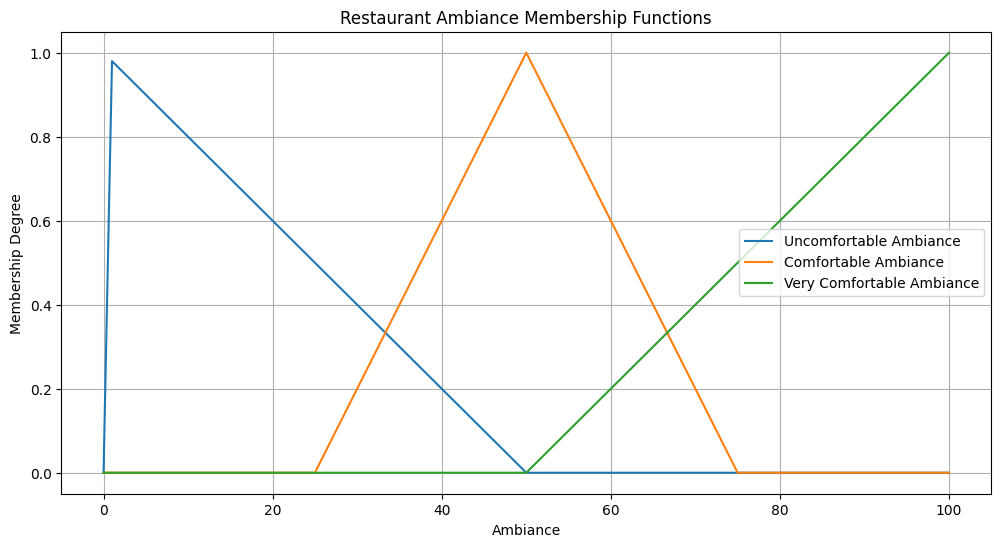

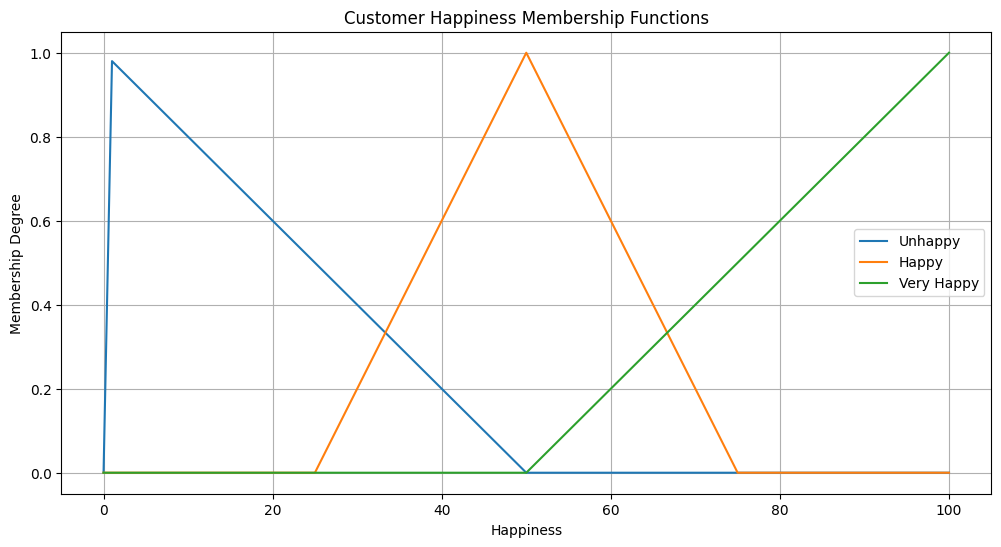

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define fuzzy variables for Tsukamoto Method
class FuzzyVariable:
    def __init__(self, name, universe, membership_functions):
        self.name = name
        self.universe = universe
        self.membership_functions = membership_functions

    def fuzzify(self, value):
        memberships = {}
        for label, func in self.membership_functions.items():
            memberships[label] = func(value)
        return memberships

# Membership functions for triangular shapes
def triangular(a, b, c):
    def func(x):
        if a <= x <= b:
            return (x - a) / (b - a) if b - a != 0 else 0
        elif b <= x <= c:
            return (c - x) / (c - b) if c - b != 0 else 0
        return 0
    return func

# Define input and output variables
service_speed = FuzzyVariable(
    "service_speed",
    universe=np.arange(0, 101, 1),
    membership_functions={
        "slow": triangular(0, 0, 50),
        "normal": triangular(25, 50, 75),
        "fast": triangular(50, 100, 100),
    },
)

food_quality = FuzzyVariable(
    "food_quality",
    universe=np.arange(0, 101, 1),
    membership_functions={
        "poor": triangular(0, 0, 50),
        "average": triangular(25, 50, 75),
        "good": triangular(50, 100, 100),
    },
)

restaurant_ambiance = FuzzyVariable(
    "restaurant_ambiance",
    universe=np.arange(0, 101, 1),
    membership_functions={
        "uncomfortable": triangular(0, 0, 50),
        "comfortable": triangular(25, 50, 75),
        "very_comfortable": triangular(50, 100, 100),
    },
)

customer_happiness = FuzzyVariable(
    "customer_happiness",
    universe=np.arange(0, 101, 1),
    membership_functions={
        "unhappy": triangular(0, 0, 50),
        "happy": triangular(25, 50, 75),
        "very_happy": triangular(50, 100, 100),
    },
)

# Define rules for Tsukamoto method
rules = [
    ("slow", "poor", "uncomfortable", "unhappy"),
    ("slow", "average", "comfortable", "unhappy"),
    ("normal", "average", "comfortable", "happy"),
    ("fast", "good", "very_comfortable", "very_happy"),
    ("normal", "good", "very_comfortable", "happy"),
    ("fast", "average", "comfortable", "happy"),
    ("fast", "poor", "uncomfortable", "unhappy"),
]

def apply_rule(service, quality, ambiance, rule):
    service_level, quality_level, ambiance_level, happiness_level = rule

    service_membership = service_speed.fuzzify(service)[service_level]
    quality_membership = food_quality.fuzzify(quality)[quality_level]
    ambiance_membership = restaurant_ambiance.fuzzify(ambiance)[ambiance_level]

    firing_strength = min(service_membership, quality_membership, ambiance_membership)

    if firing_strength > 0:
        happiness_value = defuzzify(happiness_level, firing_strength)
        return firing_strength, happiness_value
    return 0, 0

def defuzzify(level, firing_strength):
    if level == "unhappy":
        return 25 + (25 * firing_strength)
    elif level == "happy":
        return 50 + (25 * firing_strength)
    elif level == "very_happy":
        return 75 + (25 * firing_strength)
    return 0

def tsukamoto(service, quality, ambiance):
    weighted_sum = 0
    total_firing_strength = 0

    for rule in rules:
        firing_strength, value = apply_rule(service, quality, ambiance, rule)
        weighted_sum += firing_strength * value
        total_firing_strength += firing_strength

    return weighted_sum / total_firing_strength if total_firing_strength > 0 else 0

# Example: Simulate for service speed 70, food quality 80, and ambiance 60
result = tsukamoto(70, 80, 60)
print(f"Calculated Customer Happiness: {result:.2f}%")

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(service_speed.universe, [service_speed.fuzzify(x)["slow"] for x in service_speed.universe], label="Slow Service")
plt.plot(service_speed.universe, [service_speed.fuzzify(x)["normal"] for x in service_speed.universe], label="Normal Service")
plt.plot(service_speed.universe, [service_speed.fuzzify(x)["fast"] for x in service_speed.universe], label="Fast Service")
plt.title("Service Speed Membership Functions")
plt.xlabel("Service Speed")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(food_quality.universe, [food_quality.fuzzify(x)["poor"] for x in food_quality.universe], label="Poor Quality")
plt.plot(food_quality.universe, [food_quality.fuzzify(x)["average"] for x in food_quality.universe], label="Average Quality")
plt.plot(food_quality.universe, [food_quality.fuzzify(x)["good"] for x in food_quality.universe], label="Good Quality")
plt.title("Food Quality Membership Functions")
plt.xlabel("Food Quality")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(restaurant_ambiance.universe, [restaurant_ambiance.fuzzify(x)["uncomfortable"] for x in restaurant_ambiance.universe], label="Uncomfortable Ambiance")
plt.plot(restaurant_ambiance.universe, [restaurant_ambiance.fuzzify(x)["comfortable"] for x in restaurant_ambiance.universe], label="Comfortable Ambiance")
plt.plot(restaurant_ambiance.universe, [restaurant_ambiance.fuzzify(x)["very_comfortable"] for x in restaurant_ambiance.universe], label="Very Comfortable Ambiance")
plt.title("Restaurant Ambiance Membership Functions")
plt.xlabel("Ambiance")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(customer_happiness.universe, [customer_happiness.fuzzify(x)["unhappy"] for x in customer_happiness.universe], label="Unhappy")
plt.plot(customer_happiness.universe, [customer_happiness.fuzzify(x)["happy"] for x in customer_happiness.universe], label="Happy")
plt.plot(customer_happiness.universe, [customer_happiness.fuzzify(x)["very_happy"] for x in customer_happiness.universe], label="Very Happy")
plt.title("Customer Happiness Membership Functions")
plt.xlabel("Happiness")
plt.ylabel("Membership Degree")
plt.legend()
plt.grid()
plt.show()